#### Linear Regression in plain Python
In linear regression we want to model the relationship between a scalar dependent variable $y$ and one or more independent (predictor) variables $\boldsymbol{x}$.

Given:

* dataset $\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(m)}, y^{(m)})\}$
* with $\boldsymbol{x}^{(i)}$ being a $d-$dimensional vector $\boldsymbol{x}^i = (x^{(i)}_1, ..., x^{(i)}_d)$
* $y^{(i)}$ being a scalar target variable

The linear regression model can be interpreted as a very simple neural network:

* it has a real-valued weight vector $\boldsymbol{w}= (w^{(1)}, ..., w^{(d)})$
* it has a real-valued bias $b$
* it uses the identity function as its activation function

A linear regression model can be trained using either
* a) gradient descent or
* b) the normal equation (closed-form solution): $\boldsymbol{w} = (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{y}$

where $\boldsymbol{X}$ is a matrix of shape $(m, n_{features})$ that holds all training examples.
The normal equation requires computing the inverse of $\boldsymbol{X}^T \boldsymbol{X}$. The computational complexity of this operation lies between $O(n_{features}^{2.4}$) and $O(n_{features}^3$) (depending on the implementation). Therefore, if the number of features in the training set is large, the normal equation will get very slow.

The training procedure of a linear regression model has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step 0:**

Initialize the weight vector and bias with zeros (or small random values)

**OR**

Compute the parameters directly using the normal equation

**Step 1:** (Only needed when training with gradient descent)

Compute a linear combination of the input features and weights. This can be done in one step for all training examples, using vectorization and broadcasting: $\boldsymbol{\hat{y}} = \boldsymbol{X} \cdot \boldsymbol{w} + b $

where $\boldsymbol{X}$ is a matrix of shape $(m, n_{features})$ that holds all training examples, and $\cdot$ denotes the dot product.

**Step 2:** (Only needed when training with gradient descent)

Compute the cost (mean squared error) over the training set:

$J(\boldsymbol{w},b) = \frac{1}{m} \sum_{i=1}^m \Big(\hat{y}^{(i)} - y^{(i)} \Big)^2$

**Step 3:** (Only needed when training with gradient descent)

Compute the partial derivatives of the cost function with respect to each parameter:

$ \frac{\partial J}{\partial w_j} = \frac{2}{m}\sum_{i=1}^m \Big( \hat{y}^{(i)} - y^{(i)} \Big) x^{(i)}_j$

$ \frac{\partial J}{\partial b} = \frac{2}{m}\sum_{i=1}^m \Big( \hat{y}^{(i)} - y^{(i)} \Big)$

The gradient containing all partial derivatives can then be computed as follows:

$\nabla_{\boldsymbol{w}} J = \frac{2}{m} \boldsymbol{X}^T \cdot \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)$

$\nabla_{\boldsymbol{b}} J = \frac{2}{m} \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)$

**Step 4:** (Only needed when training with gradient descent)

Update the weight vector and bias:

$\boldsymbol{w} = \boldsymbol{w} - \eta \, \nabla_w J$

$b = b - \eta \, \nabla_b J$

where $\eta$ is the learning rate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(123)

#### Datset

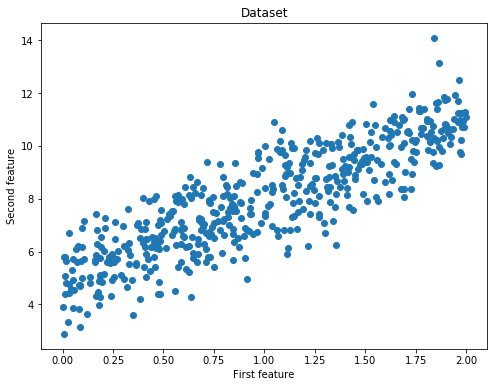

In [2]:
# We will use a simple training set
X = 2 * np.random.rand(500, 1)
y = 5 + 3 * X + np.random.randn(500, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [3]:
# Splite the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f'Shape X_train:{X_train.shape}')
print(f'Shape y_train:{y_train.shape}')
print(f'Shape X_test:{X_test.shape}')
print(f'Shape y_test:{y_test.shape}')

Shape X_train:(375, 1)
Shape y_train:(375, 1)
Shape X_test:(125, 1)
Shape y_test:(125, 1)


#### Linear regression class

In [4]:
class LinearRegression:
    
    def __init__(self):
        pass

    def train_gradient_descent(self, X, y, learning_rate=0.01, n_iters=100):
        """
        Trains a linear regression model using gradient descent
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape=(n_features,1))
        self.bias = 0
        costs = []

        for i in range(n_iters):
            # Step 1: Compute a linear combination of the input features and weights
            y_predict = np.dot(X, self.weights) + self.bias

            # Step 2: Compute cost over training set
            cost = (1 / n_samples) * np.sum((y_predict - y)**2)
            costs.append(cost)

            if i % 100 == 0:
                print(f"Cost at iteration {i}: {cost}")

            # Step 3: Compute the gradients
            dJ_dw = (2 / n_samples) * np.dot(X.T, (y_predict - y))
            dJ_db = (2 / n_samples) * np.sum((y_predict - y)) 
            
            # Step 4: Update the parameters
            self.weights = self.weights - learning_rate * dJ_dw
            self.bias = self.bias - learning_rate * dJ_db

        return self.weights, self.bias, costs

    def train_normal_equation(self, X, y):
        """
        Trains a linear regression model using the normal equation
        """
        self.weights = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        self.bias = 0
        
        return self.weights, self.bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

#### Training with gradient descent

Cost at iteration 0: 66.45256981003433
Cost at iteration 100: 2.208434614609594
Cost at iteration 200: 1.2797812854182806
Cost at iteration 300: 1.2042189195356685
Cost at iteration 400: 1.1564867816573
Cost at iteration 500: 1.121391041394467


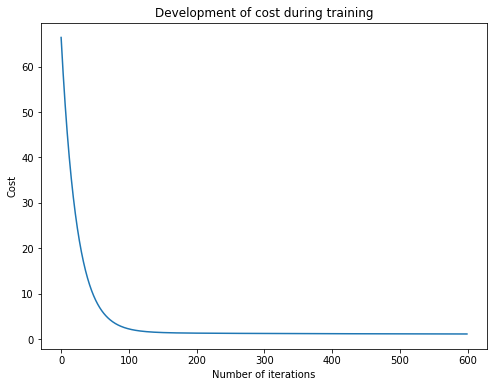

In [5]:
regressor = LinearRegression()
w_trained, b_trained, costs = regressor.train_gradient_descent(X_train, y_train, learning_rate=0.005, n_iters=600)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

#### Testing(gradient descent model)

In [6]:
n_samples, _ = X_train.shape
n_samples_test, _ = X_test.shape

y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"Error on training set: {np.round(error_train, 4)}")
print(f"Error on test set: {np.round(error_test)}")

Error on training set: 1.0955
Error on test set: 1.0


#### Training with normal equation

In [7]:
# To compute the parameters using the normal equation, we add a bias value of 1 to each input example
X_b_train = np.c_[np.ones((n_samples)), X_train]
X_b_test = np.c_[np.ones((n_samples_test)), X_test]

reg_normal = LinearRegression()
w_trained = reg_normal.train_normal_equation(X_b_train, y_train)

#### Testing (normal equation model)

In [8]:

y_p_trainy_p_trai  = reg_normal.predict(X_b_train)
y_p_test = reg_normal.predict(X_b_test)

error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"Error on training set: {np.round(error_train, 4)}")
print(f"Error on test set: {np.round(error_test, 4)}")

Error on training set: 1.0955
Error on test set: 1.0432


#### Visualize test predictions

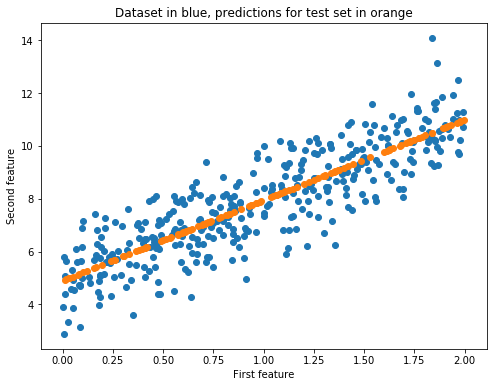

In [9]:
# Plot the test predictions# Plot t 

fig = plt.figure(figsize=(8,6))
plt.title("Dataset in blue, predictions for test set in orange")
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_p_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()